<a href="https://colab.research.google.com/github/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp/notebooks/google-colab/better_nlp_summarisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Better NLP

This is a wrapper program/library that encapsulates a couple of NLP libraries that are popular among the AI and ML communities.

Examples have been used to illustrate the usage as much as possible. Not all the APIs of the underlying libraries have been covered.

The idea is to keep the API language as high-level as possible, so its easier to use and stays human-readable.

Libraries / frameworks covered:

- nltk [site](http://www.nltk.org/) | [docs](https://buildmedia.readthedocs.org/media/pdf/nltk/latest/nltk.pdf)
- numpy [site](https://www.numpy.org/) | [docs](https://docs.scipy.org/doc/)
- networkx [site](https://networkx.github.io/) | [docs](https://networkx.github.io/documentation/stable/index.html)

See [https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp) for more details.

### This notebook will demonstrate the below NLP features / functionalities, using the above mentioned libraries

- Cosine similarity summarisation technique (extractive summarisation)
- Vertex ranking algorithm summarisation technique
- Build a simple text summarisation tool using NLTK
- Summarisation 4 (TODO)
- Summarisation 5 (TODO)

_Summarisation can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning._

### Resources

- [Understand Text Summarization and create your own summarizer in python](https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70) or [An Introduction to Text Summarization using the TextRank Algorithm (with Python implementation)](https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/)
- [Beyond bag of words: Using PyTextRank to find Phrases and Summarize text](https://medium.com/@aneesha/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5)
- [Build a simple text summarisation tool using NLTK](https://medium.com/@wilamelima/build-a-simple-text-summarisation-tool-using-nltk-ff0984fedb4f)
- [Summarise Text with TFIDF in Python 1/2](https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8) and [Summarise Text with TFIDF in Python 2/2](https://medium.com/@shivangisareen/summarise-text-with-tfidf-in-python-bc7ca10d3284)
- [How to Make a Text Summarizer - Intro to Deep Learning #10 by Siraj Raval](https://www.youtube.com/watch?v=ogrJaOIuBx4)

#### Setup and installation ( optional )

In case, this notebook is running in a local environment (Linux/MacOS) or _Google Colab_ environment and in case it does not have the necessary dependencies installed then please execute the steps in the next section.

Otherwise, please SKIP to the **Install Spacy model ( NOT optional )** section.

In [1]:
%%time
%%bash

apt-get install apt-utils dselect dpkg

echo "OSTYPE=$OSTYPE"
if [[ "$OSTYPE" == "cygwin" ]] || [[ "$OSTYPE" == "msys" ]] ; then
    echo "Windows or Windows-like environment detected, script not tested, and may not work."
    echo "Try installing the components mention in the install-[ostype].sh scripts manually."
    echo "Or try running under CGYWIN or git-bash."
    echo "If successfully installed, please contribute back with the solution via a pull request, to https://github.com/neomatrix369/awesome-ai-ml-dl/"
    echo "Please give the file a good name, i.e. install-windows.sh or install-windows.bat depending on what kind of script you end up writing"
    exit 0
elif [[ "$OSTYPE" == "linux-gnu" ]] || [[ "$OSTYPE" == "linux" ]]; then
    TARGET_OS="linux"
else
    TARGET_OS="macos"
fi

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
  
  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl"
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/build

  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true 
fi

Reading package lists...
Building dependency tree...
Reading state information...
apt-utils is already the newest version (1.4.9).
dpkg is already the newest version (1.18.25).
dselect is already the newest version (1.18.25).
0 upgraded, 0 newly installed, 0 to remove and 78 not upgraded.
OSTYPE=linux-gnu
Library source found
Detected OS: linux
Please check if you fulfill the requirements mentioned in the README file.
Ign:1 http://deb.debian.org/debian stretch InRelease
Hit:2 http://security.debian.org/debian-security stretch/updates InRelease
Get:3 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]
Hit:4 http://deb.debian.org/debian stretch Release
Hit:5 https://deb.nodesource.com/node_8.x stretch InRelease
Fetched 91.0 kB in 1s (85.5 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
libswscale-dev is already the newest version (7:3.2.14-1~deb9u1).
liblapack-dev is already the newest version (3.7.0-2).
pkg-co

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


CPU times: user 24.7 ms, sys: 18.5 ms, total: 43.2 ms
Wall time: 1min 5s


#### Install Spacy model ( NOT optional )

Install the large English language model for spaCy - will be needed for the examples in this notebooks.

**Note:** from observation it appears that spaCy model should be installed towards the end of the installation process, it avoid errors when running programs using the model.

In [2]:
%%time
%%bash

python -m spacy download en_core_web_lg
python -m spacy link en_core_web_lg en || true

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')

✘ Link 'en' already exists
To overwrite an existing link, use the --force flag



You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


CPU times: user 9.32 ms, sys: 9.09 ms, total: 18.4 ms
Wall time: 6.84 s


## Examples of various summarisation methods

### 1. Cosine similarity summarisation technique (extractive summarisation)

**Abstractive Summarization:** Abstractive methods select words based on semantic understanding, even those words did not appear in the source documents. It aims at producing important material in a new way. They interpret and examine the text using advanced natural language techniques in order to generate a new shorter text that conveys the most critical information from the original text.

**Flow:** Input document → understand context → semantics → create own summary

**Extractive Summarization:** Extractive methods attempt to summarize articles by selecting a subset of words that retain the most important points.

**Flow:** Input document → sentences similarity → weight sentences → select sentences with higher rank

**Cosine similarity** is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. Angle will be 0 if sentences are similar and tend towards 90 as they begin to differ.

Inspired by Praveen Dubey the author of https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

or see [Understand Text Summarization and create your own summarizer in python](https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/)

In [1]:
import sys
sys.path.insert(0, '../../library')
sys.path.insert(0, './awesome-ai-ml-dl/examples/better-nlp/library')

from org.neomatrix369.better_nlp import BetterNLP

import pprint
pp = pprint.PrettyPrinter(indent=4)

This version of Python is 64 bits.
This version of Python is 64 bits.
This version of Python is 64 bits.
This version of Python is 64 bits.
This version of Python is 64 bits.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
betterNLP = BetterNLP() ### do not re-run this unless you wish to re-initialise the object
generic_text="""In an attempt to build an AI-ready workforce, SmartSoft Corp. announced Smart Colab Program which has been launched to empower the next generation of students with AI-ready skills. Envisioned as a three-year collaborative program, Smart Colab Program will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. As part of the program, the Palo Alto giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses. The company will provide AI development tools and AI services such as SmartSoft Corp. Cognitive Services, Bot Services and Machine Learning Services. According to Mark Smith, Country AI Manager, SmartSoft Corp. India, said, "With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset. This will require more collaborations and training and working with AI. That’s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies. The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow." The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry. Earlier in April this year, the company announced SmartSoft Corp. Advanced Program In AI as a learning track open to the public. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well. This program also included developer-focused AI school that provided a bunch of assets to help build AI skills."""

In [3]:
summarised_result = betterNLP.summarise(generic_text)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
pp.pprint("summarised_text=" + summarised_result['summarised_text'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 0.1727583408355713
('summarised_text=The company will provide AI development tools and AI '
 'services such as SmartSoft Corp. Envisioned as a three-year collaborative '
 'program, Smart Colab Program will support around 100 institutions with AI '
 'infrastructure, course content and curriculum, developer support, '
 'development tools and give students access to cloud and AI services. '
 'According to Mark Smith, Country AI Manager, SmartSoft Corp. Advanced '
 'Program In AI as a learning track open to the public. This will require more '
 'collaborations and training and working with AI')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [4]:
print("ranked_sentences=") 
pp.pprint(summarised_result['ranked_sentences'])

ranked_sentences=
[   (   0.13833101031465372,
        [   'The',
            'company',
            'will',
            'provide',
            'AI',
            'development',
            'tools',
            'and',
            'AI',
            'services',
            'such',
            'as',
            'SmartSoft',
            'Corp']),
    (   0.10383640827971251,
        [   'Envisioned',
            'as',
            'a',
            'three-year',
            'collaborative',
            'program,',
            'Smart',
            'Colab',
            'Program',
            'will',
            'support',
            'around',
            '100',
            'institutions',
            'with',
            'AI',
            'infrastructure,',
            'course',
            'content',
            'and',
            'curriculum,',
            'developer',
            'support,',
            'development',
            'tools',
            'and',
            'give',
            's

### 2. Vertex ranking algorithm summarisation technique

Using PyTextRank to find Phrases and Summarize text: Multi-word Phrase Extraction and Sentence Extraction for Summarization

Inspired by the author of https://medium.com/@aneesha/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5 
(Notebook: https://github.com/DerwenAI/pytextrank/blob/master/example.ipynb)

Another resource to take a look at: https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

In [6]:
betterNLP = BetterNLP() ### do not re-run this unless you wish to re-initialise the object

sentence_text:  ['In', 'an', 'attempt', 'to', 'build', 'an', 'AI-ready', 'workforce', ',', 'SmartSoft', 'Corp.', 'announced', 'Smart', 'Colab', 'Program', 'which', 'has', 'been', 'launched', 'to', 'empower', 'the', 'next', 'generation', 'of', 'students', 'with', 'AI-ready', 'skills', '.']
make sentence(sentence_text): In an attempt to build an AI-ready workforce, SmartSoft Corp. announced Smart Colab Program which has been launched to empower the next generation of students with AI-ready skills.
sentence_text:  ['Envisioned', 'as', 'a', 'three-year', 'collaborative', 'program', ',', 'Smart', 'Colab', 'Program', 'will', 'support', 'around', '100', 'institutions', 'with', 'AI', 'infrastructure', ',', 'course', 'content', 'and', 'curriculum', ',', 'developer', 'support', ',', 'development', 'tools', 'and', 'give', 'students', 'access', 'to', 'cloud', 'and', 'AI', 'services', '.']
make sentence(sentence_text): Envisioned as a three-year collaborative program, Smart Colab Program will suppo

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


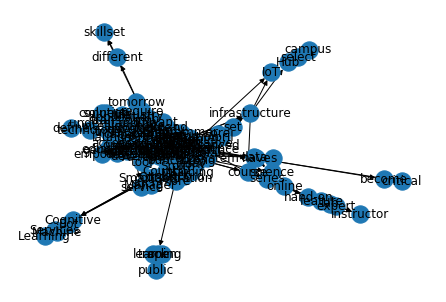

In [9]:
source_file='source.json'
source_json_content='{"id":"777", "text":"In an attempt to build an AI-ready workforce, SmartSoft Corp. announced Smart Colab Program which has been launched to empower the next generation of students with AI-ready skills. Envisioned as a three-year collaborative program, Smart Colab Program will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. As part of the program, the Palo Alto giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses. The company will provide AI development tools and AI services such as SmartSoft Corp. Cognitive Services, Bot Services and Machine Learning Services. According to Mark Smith, Country AI Manager, SmartSoft Corp. India, said, ''With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset. This will require more collaborations and training and working with AI. That''s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies. The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow.'' The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry. Earlier in April this year, the company announced SmartSoft Corp. Advanced Program In AI as a learning track open to the public. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well. This program also included developer-focused AI school that provided a bunch of assets to help build AI skills."}'
f = open(source_file, 'w')
f.write("%s" % source_json_content)
f.close()

summarised_result = betterNLP.summarise(source_file, method="pytextrank")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=",summarised_result['summarised_text'])
print("token_ranks=",summarised_result['token_ranks'])
print("key_phrases=",summarised_result['key_phrases'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
betterNLP.show_graph(summarised_result["graph"])

### 3. Build a simple text summarisation tool using NLTK

Inspired by Wilame Lima Vallantin, the author of [Build a simple text summarisation tool using NLTK](https://medium.com/@wilamelima/build-a-simple-text-summarisation-tool-using-nltk-ff0984fedb4f).

We have to break the text into sentences and tokens, remove stop-words. Tokenise words, calculate word frequency to determine if a word is important on the corpus, using the TF-IDF technique.

In [10]:
summarised_result = betterNLP.summarise(generic_text, method="tfidf")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=")
pp.pprint(summarised_result['summarised_text'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'al', 'au', 'bi', 'could', 'de', 'diesis', 'doe', 'dy', 'e', 'ha', 'might', 'mus', 'must', "n't", 'need', 'sha', 'un', 'wa', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 10.810009956359863
summarised_text=
[   'Envisioned as a three-year collaborative program, Smart Colab Program '
    'will support around 100 institutions with AI infrastructure, course '
    'content and curriculum, developer support, development tools and give '
    'students access to cloud and AI services.',
    'As part of the program, the Palo Alto giant which wants to expand its '
    'reach and is planning to build a strong developer ecosystem in India with '
    'the program will set up the core AI infrastructure and IoT Hub for the '
    'selected campuses.']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [11]:
print("important_words=")
pp.pprint(summarised_result['important_words'])

important_words=
[   ('ai', 0.5370250501018179),
    ('program', 0.4130961923860138),
    ('service', 0.2065480961930069),
    ('skill', 0.2065480961930069),
    ('build', 0.2065480961930069),
    ('corp.', 0.16523847695440552),
    ('smartsoft', 0.16523847695440552),
    ('cloud', 0.12392885771580414),
    ('require', 0.08261923847720276),
    ('tomorrow', 0.08261923847720276),
    ('job', 0.08261923847720276),
    ('industry', 0.08261923847720276),
    ('technology', 0.08261923847720276),
    ('learning', 0.08261923847720276),
    ('cognitive', 0.08261923847720276),
    ('provide', 0.08261923847720276),
    ('company', 0.08261923847720276),
    ('india', 0.08261923847720276),
    ('tool', 0.08261923847720276),
    ('development', 0.08261923847720276),
    ('developer', 0.08261923847720276),
    ('course', 0.08261923847720276),
    ('infrastructure', 0.08261923847720276),
    ('institution', 0.08261923847720276),
    ('support', 0.08261923847720276),
    ('student', 0.0826192384772027

### 4. Summarising text in python using a variation of TF-IDF method


Inspired by Shivangi Sareen from the posts:
[Summarise Text with TFIDF in Python 1](https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8) and [Summarise Text with TFIDF in Python 2](https://medium.com/@shivangisareen/summarise-text-with-tfidf-in-python-bc7ca10d3284)

We have to break the text into sentences and tokens, ***we do not remove stop-words*** but do remove special characters. Tokenise words, calculate word TF and IDF frequencies to determine if a word is important on the corpus, using the TF-IDF technique. And then based on the average score method filter out only those sentences that meet the criteria.

We could also use the (average score + 1.5 * std dev) or (average score + 3 * std dev), depending on the size of the target documents to summarise.

In [12]:
summarised_result = betterNLP.summarise(generic_text, method="tfidf-ignore-stopwords")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
pp.pprint("summarised_text=" + summarised_result['summarised_text'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 0.027053356170654297
('summarised_text=Earlier in April this year, the company announced SmartSoft '
 'Corp. Advanced Program In AI as a learning track open to the public. That’s '
 'why it has become more critical than ever for educational institutions to '
 'integrate new cloud and AI technologies. According to Mark Smith, Country AI '
 'Manager, SmartSoft Corp. India, said, "With AI being the defining technology '
 'of our time, it is transforming lives and industry and the jobs of tomorrow '
 'will require a different skillset. In an attempt to build an AI-ready '
 'workforce, SmartSoft Corp. announced Smart Colab Program which has been '
 'launched to empower the next generation of students with AI-ready skills. '
 'The program is an attempt to ramp up the institutional set-up and build '
 'capabilities among the educators to educate the workforce of tomorrow."')
~~~

In [13]:
print("scored_documents=")
pp.pprint(summarised_result['scored_documents'])

scored_documents=
[   {   'doc_id': 10,
        'sent_score': 1.5890269151739729,
        'sentence': 'Earlier in April this year, the company announced '
                    'SmartSoft Corp. Advanced Program In AI as a learning '
                    'track open to the public.'},
    {   'doc_id': 7,
        'sent_score': 1.285959013388815,
        'sentence': 'That’s why it has become more critical than ever for '
                    'educational institutions to integrate new cloud and AI '
                    'technologies.'},
    {   'doc_id': 5,
        'sent_score': 1.0194666026064951,
        'sentence': 'According to Mark Smith, Country AI Manager, SmartSoft '
                    'Corp. India, said, "With AI being the defining technology '
                    'of our time, it is transforming lives and industry and '
                    'the jobs of tomorrow will require a different skillset.'},
    {   'doc_id': 1,
        'sent_score': 0.9895530969743801,
        'sentence': 'I